### Linear Regression
This notebooks uses code from this [guide](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f) and should save some copy and paste work. The code was slightly adapted and augmented with some inline comments.
#### Preparation
* Clone the repository to $HOME/gitwork/github or adjust the cell which loads the dataset.
* Download the [Weather.csv](https://drive.google.com/open?id=1fiHg5DyvQeRC4SyhsVnje5dhJNyVWpO1) file to the folder ./data.

In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [62]:
# change dir to jupyter project folder and load dataset
import os
from os.path import expandvars
os.chdir(expandvars('$HOME/gitwork/github/jupyter-notebooks'))

dataset = pd.read_csv('./data/Weather.csv', usecols=['MinTemp', 'MaxTemp'])

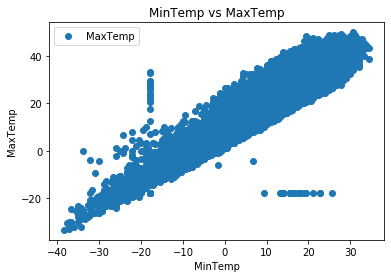

In [14]:
# plot the data set
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

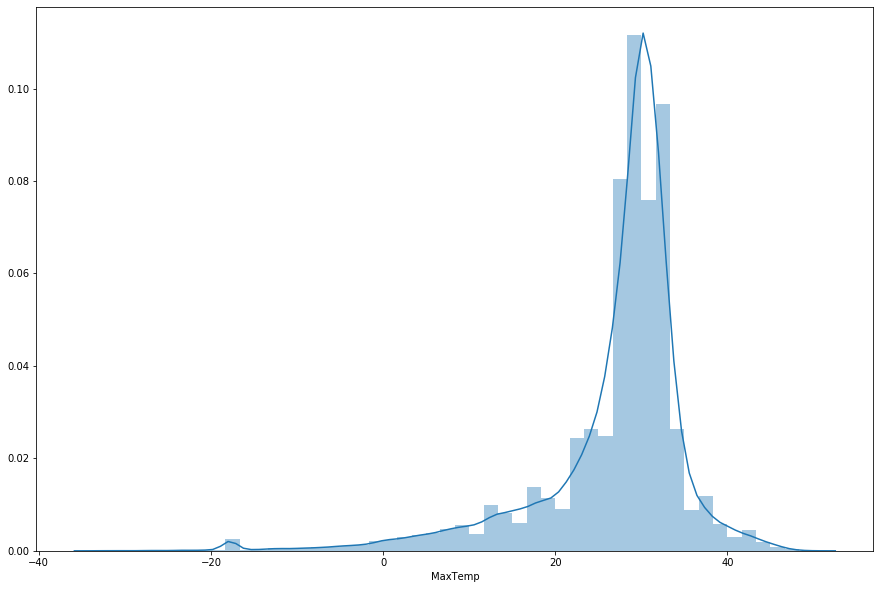

In [31]:
# show MaxTemp distribution
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp']);

### Training
In scikit-learn a random split into training and test sets can be quickly computed with the 
[train_test_split](https://scikit-learn.org/stable/modules/cross_validation.html)
helper function

In [17]:
# Attributes are the independent variables 
# while labels are dependent variables (predicted)
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
np.reshape

In [18]:
# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# select algorithm and train the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# resulting linear regression function
print('y={m}*x+{b}'.format(
    m=round(regressor.coef_[0][0],2), 
    b=round(regressor.intercept_[0],1)))

y=0.92*x+10.7


In [21]:
# predict values from test data
y_pred = regressor.predict(X_test)

In [42]:
# create data frame with actual and predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df[:5]

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852


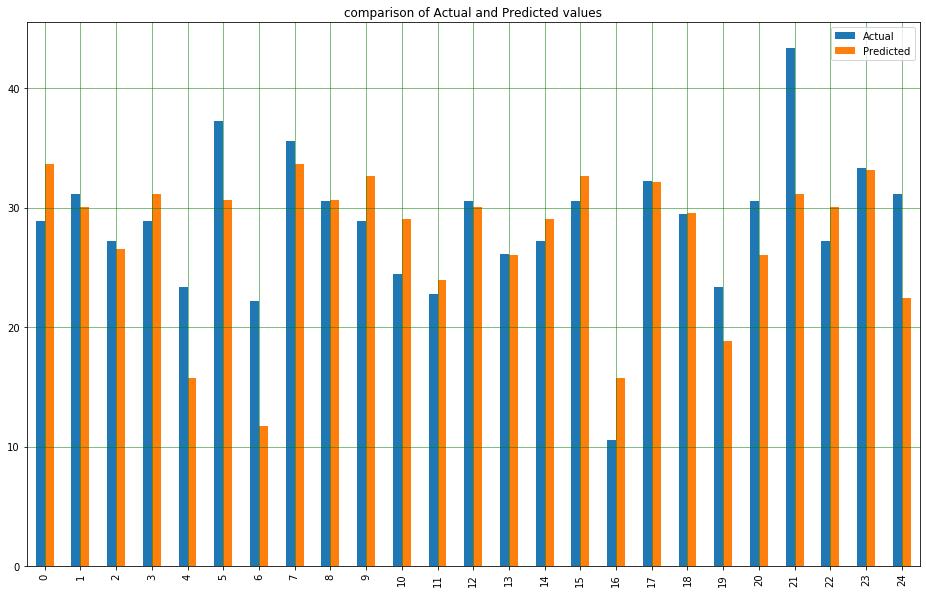

In [24]:
# plot bar chart with actual and predicted values (1st 25 values)
df1 = df.head(25)
df1.plot(title='comparison of Actual and Predicted values', kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

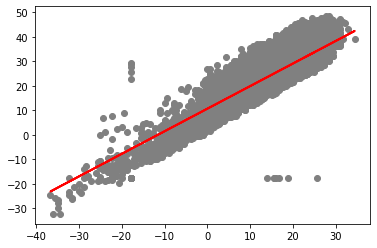

In [46]:
# plot regression function with test data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [60]:
# evaluate prediction quality using MAE and RMSE metrics
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2)
print('Mean Absolute Error:', round(
    metrics.mean_absolute_error(y_test, y_pred), 2))   
print('Root Mean Squared Error:', rmse)
print('RMSE: {}%'.format(round(100*rmse/dataset.MaxTemp.mean())))

Mean Absolute Error: 3.2
Root Mean Squared Error: 4.2
RMSE: 16.0%
